In [2]:
import pandas as pd
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
from datetime import datetime,time

In [3]:
data=pd.read_excel("C:/Users/ARAVINDH/Downloads/Airlines+Data.xlsx")

In [4]:
data.head(3)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


In [5]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)
indexedDataset=data.set_index(['Month'])

In [6]:
data.head(2)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118


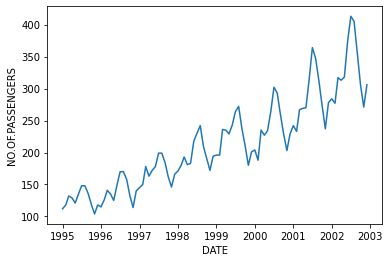

In [7]:
plt.xlabel('DATE')
plt.ylabel('NO.OF.PASSENGERS')
plt.plot(indexedDataset)

In [ ]:
#Rolling statistics Determination

In [8]:
rolmean=indexedDataset.rolling(window=12).mean()

In [9]:
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


In [ ]:
#Rolling statistics Plotting

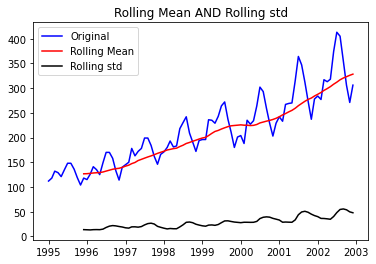

In [10]:
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean, color='red',label='Rolling Mean')
std=plt.plot(rolstd, color ='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean AND Rolling std')
plt.show(block=False)

In [ ]:
#Estimating trend

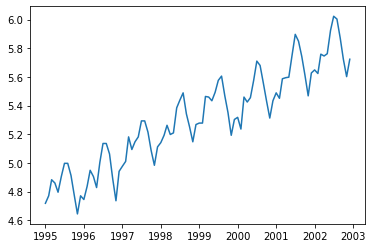

In [11]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [12]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()

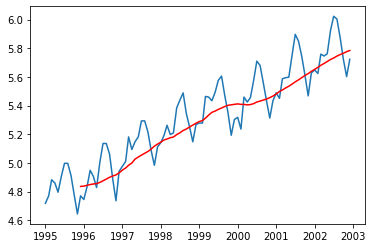

In [14]:
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [13]:
df=indexedDataset_logScale - movingAverage
df.head(3)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN


In [ ]:
#Removing NA values

In [14]:
df.dropna(inplace=True)

In [15]:
df.head(3)

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566


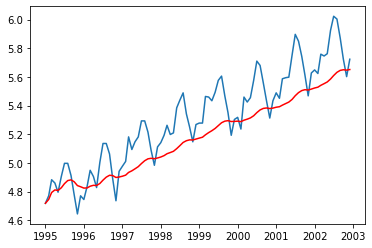

In [20]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

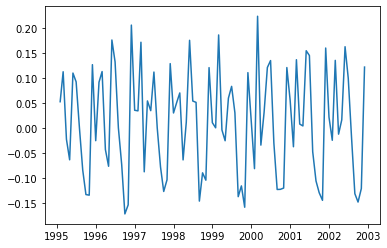

In [22]:
datasetLogScaleMinusMovingExponentDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [23]:
datasetLogDiffShifting.head(2)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,0.052186


In [24]:
datasetLogDiffShifting.dropna(inplace=True)

In [25]:
datasetLogDiffShifting.head(2)

,Passengers
Month,
1995-02-01,0.052186
1995-03-01,0.112117


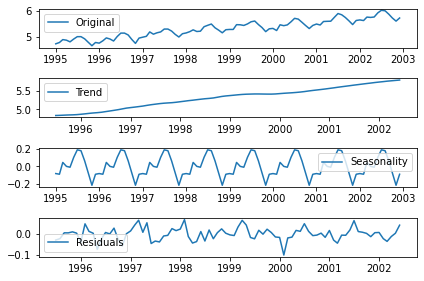

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal= decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decompositionLogData = residual
decompositionLogData.dropna(inplace = True)


In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf,pacf

In [28]:
acf=acf(datasetLogDiffShifting,nlags=20)
pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')

C:\Users\ARAVINDH\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


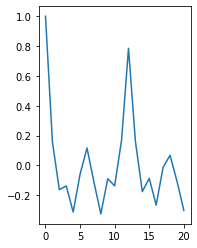

In [29]:
plt.subplot(121)
plt.plot(acf)

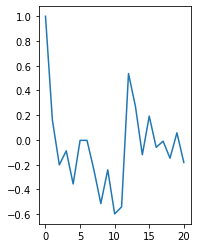

In [30]:
plt.subplot(122)
plt.plot(pacf)

In [ ]:
#model fitting

C:\Users\ARAVINDH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ARAVINDH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ARAVINDH\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\ARAVINDH\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed aft

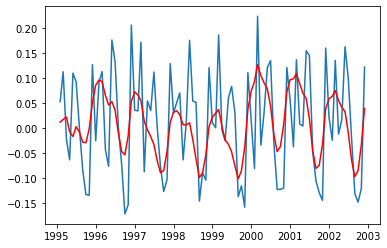

In [32]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexedDataset_logScale,order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')

In [36]:
predictions_ARIMA_diff=pd.Series(results_AR.fittedvalues, copy=True)

In [38]:
predictions_ARIMA_diff

Month
1995-02-01    0.011261
1995-03-01    0.016603
1995-04-01    0.021664
1995-05-01   -0.008096
1995-06-01   -0.017396
                ...   
2002-08-01   -0.064372
2002-09-01   -0.097868
2002-10-01   -0.085681
2002-11-01   -0.033963
2002-12-01    0.038855
Length: 95, dtype: float64

In [ ]:
#commulative sum

In [40]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1995-02-01    0.011261
1995-03-01    0.027864
1995-04-01    0.049528
1995-05-01    0.041431
1995-06-01    0.024035
                ...   
2002-08-01    0.954064
2002-09-01    0.856196
2002-10-01    0.770515
2002-11-01    0.736552
2002-12-01    0.775407
Length: 95, dtype: float64

In [42]:
predictions_ARIMA_log=pd.Series(indexedDataset_logScale['Passengers'].iloc[0],index =indexedDataset_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

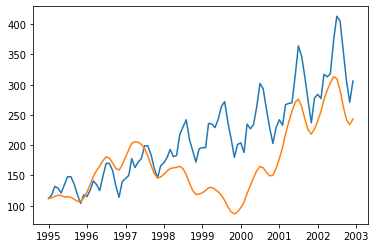

In [43]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

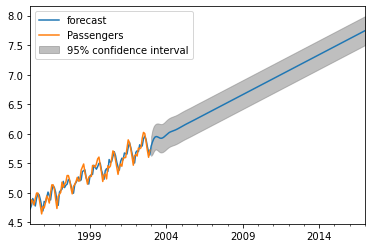

In [45]:
results_AR.plot_predict(1,264)
result=results_AR.forecast(steps=100)

In [48]:
result[1]

array([0.08321269, 0.10429576, 0.10873951, 0.10874341, 0.11125758,
       0.11613188, 0.12022568, 0.1220291 , 0.12227464, 0.12233655,
       0.12284854, 0.12357395, 0.1240826 , 0.12425602, 0.12426369,
       0.12429388, 0.12439243, 0.12449991, 0.1245609 , 0.12457535,
       0.12457537, 0.12458406, 0.12460131, 0.12461628, 0.124623  ,
       0.12462391, 0.12462415, 0.12462612, 0.12462889, 0.12463084,
       0.1246315 , 0.12463153, 0.12463164, 0.12463203, 0.12463244,
       0.12463268, 0.12463273, 0.12463273, 0.12463276, 0.12463283,
       0.12463289, 0.12463291, 0.12463292, 0.12463292, 0.12463293,
       0.12463294, 0.12463295, 0.12463295, 0.12463295, 0.12463295,
       0.12463295, 0.12463295, 0.12463295, 0.12463295, 0.12463295,
       0.12463295, 0.12463295, 0.12463295, 0.12463295, 0.12463295,
       0.12463295, 0.12463295, 0.12463295, 0.12463295, 0.12463295,
       0.12463295, 0.12463295, 0.12463295, 0.12463295, 0.12463295,
       0.12463295, 0.12463295, 0.12463295, 0.12463295, 0.12463

In [49]:
len(result[1])

100